# Compare all the models and visualization

###  Read clean data

In [2]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'Group_2_clean_Data..csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()


,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,149.0,28.0,55.0,509.0,1.0,11980.0,3.10,1.37,91.78,6.50,...,14.1,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,1034.0,35.0,58.0,424.0,1.0,23123.0,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,1780.0,34.0,114.0,959.0,1.0,29344.0,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,664.0,31.0,53.0,213.0,1.0,16656.0,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,5.0,21.08,306.64,4425.45
4,140.0,22.0,82.0,471.0,1.0,11245.0,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,374.06,9988.79


## we are going to use the features refined after using wraping elimninative method

In [5]:
# using refined model
select_feature= ['persPoverty', 'persUrban', 'numForeignBorn', 'kidsBornNevrMarr', 'pop', 'houseVacant', 'persEmergShelt', 'persHomeless', 'pctLargHous', 'NAperCap']
df_feature = df[select_feature]
df_target = df['burglaries']  # Select the 'violentPerPop' column as the target variable

df_feature.head(5)


,persPoverty,persUrban,numForeignBorn,kidsBornNevrMarr,pop,houseVacant,persEmergShelt,persHomeless,pctLargHous,NAperCap
0,227.0,11980.1,1277.0,31.0,11980.0,64.0,11.0,0.1,4.17,5725.0
1,885.0,23123.0,1920.0,43.0,23123.0,240.0,0.0,0.0,3.34,0.0
2,1389.0,29344.0,1468.0,164.0,29344.0,544.0,16.0,0.0,2.05,21606.0
3,2831.0,0.0,339.0,561.0,16656.0,669.0,0.0,0.0,2.56,4941.0
4,2855.0,0.0,196.0,402.0,11245.0,333.0,2.0,0.0,3.11,4425.0


# Comparing with all the models

## 1. Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_model.predict(X_train)

# Predict on the testing set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R2)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Random Forest Model Performance:")
print("Training Set:")
print(f"  - Mean Squared Error: {train_mse:.2f}")
print(f"  - R-squared: {train_r2:.2f}")
print("Testing Set:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")


Random Forest Model Performance:
Training Set:
  - Mean Squared Error: 497077.62
  - R-squared: 0.96
Testing Set:
  - Mean Squared Error: 226357.28
  - R-squared: 0.91


##  2. XGBOOST model

In [9]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Refined feature set and target
select_features = ['persPoverty', 'persUrban', 'numForeignBorn', 'kidsBornNevrMarr', 'pop', 
                   'houseVacant', 'persEmergShelt', 'persHomeless', 'pctLargHous', 'NAperCap']
df_feature = df[select_features]  # Select refined features
df_target = df['burglaries']  # Select the target variable

# Train-test split
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_selected, y_train)

# Predictions
y_pred_train = xgb_model.predict(X_train_selected)  # Predictions on the training set
y_pred_test = xgb_model.predict(X_test_selected)  # Predictions on the test set

# Evaluate on training set
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Evaluate on test set
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print(f"XGBoost Model:")
print(f"Training Set Metrics:")
print(f"  - Mean Squared Error: {train_mse:.2f}")
print(f"  - R-squared: {train_r2:.2f}")
print(f"Testing Set Metrics:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")


XGBoost Model:
Training Set Metrics:
  - Mean Squared Error: 16574.74
  - R-squared: 1.00
Testing Set Metrics:
  - Mean Squared Error: 201333.03
  - R-squared: 0.92


### 3. Extreme Learning Machine (ELM)

In [63]:
i
from sklearn.preprocessing import StandardScaler
from hpelm import ELM

# Split into training and testing sets first
X_train, X_test, y_train, y_test = train_test_split(
    df_feature.values, df_target.values, test_size=0.2, random_state=42
)

# Scale the features (X)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)  # Fit on training data and transform it
X_test_scaled = scaler_X.transform(X_test)  # Transform test data using the same scaler

# Scale the target variable (y)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()  # Fit and transform y_train
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()  # Transform y_test

# Initialize the ELM model for regression
elm_model = ELM(inputs=X_train_scaled.shape[1], outputs=1, classification="", accelerator="CPU")

# Add hidden neurons
elm_model.add_neurons(64, "tanh")  # Adjust the number of neurons as needed

# Train the ELM model
elm_model.train(X_train_scaled, y_train_scaled, "R")  # Train with scaled y_train

# Predict on the training and testing sets
y_train_scaled_pred = elm_model.predict(X_train_scaled).flatten()
y_test_scaled_pred = elm_model.predict(X_test_scaled).flatten()

# Inverse-transform predictions back to the original scale
y_train_pred = scaler_y.inverse_transform(y_train_scaled_pred.reshape(-1, 1)).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_scaled_pred.reshape(-1, 1)).flatten()

# Evaluate the model using original-scale metrics
train_mse = mean_squared_error(y_train, y_train_pred)  # Use original-scale y
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)  # Use original-scale y
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("ELM Model Performance (Regression with Feature and Target Scaling):")
print("Training Set:")
print(f"  - Mean Squared Error: {train_mse:.2f}")
print(f"  - R-squared: {train_r2:.2f}")
print("Testing Set:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")


ELM Model Performance (Regression with Feature and Target Scaling):
Training Set:
  - Mean Squared Error: 1264430.73
  - R-squared: 0.89
Testing Set:
  - Mean Squared Error: 795244.40
  - R-squared: 0.70


### 4. Simple Deep Learning Model with Two Layers

Epoch 1/50


C:\Users\hyz20\miniconda3\envs\gpu-env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0025 - mse: 0.4918 - val_loss: 3.3982 - val_mse: 2.9098
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 0.6984 - mse: 0.2172 - val_loss: 1.9356 - val_mse: 1.4751
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.6297 - mse: 0.1756 - val_loss: 1.0196 - val_mse: 0.5842
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.5223 - mse: 0.0929 - val_loss: 0.5881 - val_mse: 0.1760
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.4598 - mse: 0.0532 - val_loss: 0.4766 - val_mse: 0.0859
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 0.4268 - mse: 0.0412 - val_loss: 0.4904 - val_mse: 0.1195
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.4129 - mse: 0.0467 - val_loss: 0.5088 - val_mse: 0.1562
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.3889 - mse: 0.0407 - val_loss: 0.4881 - val_mse: 0.1524
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step

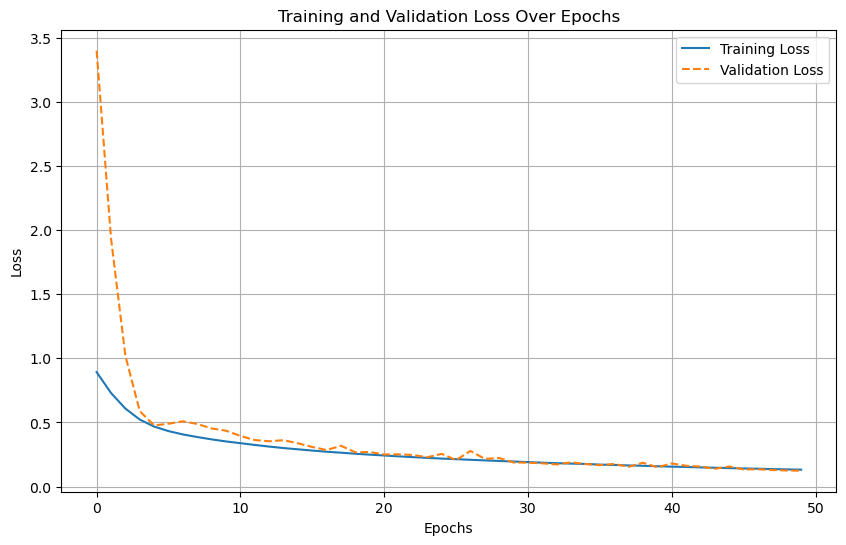

In [56]:

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_feature.values, df_target.values, test_size=0.2, random_state=42
)

# Scale the features (X)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)  # Fit and transform the training set
X_test_scaled = scaler_X.transform(X_test)  # Transform the test set

# Scale the target variable (y)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Build a Multilayer Perceptron (MLP) with regularization
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.005)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.005)),
    Dense(1)  # Output layer for regression
])

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mse'])

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Predict on the training and testing sets
y_train_scaled_pred = model.predict(X_train_scaled).flatten()
y_test_scaled_pred = model.predict(X_test_scaled).flatten()

# Inverse-transform predictions back to the original scale
y_train_pred = scaler_y.inverse_transform(y_train_scaled_pred.reshape(-1, 1)).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_scaled_pred.reshape(-1, 1)).flatten()

# Evaluate the model using original-scale metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("MLP Model Performance :")
print("Training Set:")
print(f"  - Mean Squared Error: {train_mse:.2f}")
print(f"  - R-squared: {train_r2:.2f}")
print("Testing Set:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")

# Plot the training and validation loss
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


## 5. Ensemble Model Combining the Top 3 Models

We are going to combine random forest , xgboost model and 2 layer neural network model

In [9]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Initialize the base models
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)  # Model 1
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # Model 2

# Scale the features and target for the neural network
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Build the 2-layer neural network (Model 3)
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.005)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.005)),
    Dense(1)
])

mlp_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mse'])
mlp_model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, verbose=0)

# Generate predictions for stacking
kf = KFold(n_splits=5, shuffle=True, random_state=42)
meta_features_train = np.zeros((X_train.shape[0], 3))  # Store predictions for meta-model training
meta_features_test = np.zeros((X_test.shape[0], 3))  # Store predictions for meta-model testing

for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train Random Forest
    rf_model.fit(X_train_fold, y_train_fold)
    meta_features_train[val_idx, 0] = rf_model.predict(X_val_fold)
    meta_features_test[:, 0] += rf_model.predict(X_test) / kf.n_splits

    # Train XGBoost
    xgb_model.fit(X_train_fold, y_train_fold)
    meta_features_train[val_idx, 1] = xgb_model.predict(X_val_fold)
    meta_features_test[:, 1] += xgb_model.predict(X_test) / kf.n_splits

    # Train Neural Network
    X_train_fold_scaled = scaler_X.transform(X_train_fold)
    X_val_fold_scaled = scaler_X.transform(X_val_fold)
    y_train_fold_scaled = scaler_y.fit_transform(y_train_fold.values.reshape(-1, 1)).flatten()

    mlp_model.fit(X_train_fold_scaled, y_train_fold_scaled, epochs=50, batch_size=32, verbose=0)
    meta_features_train[val_idx, 2] = scaler_y.inverse_transform(
        mlp_model.predict(X_val_fold_scaled).flatten().reshape(-1, 1)
    ).flatten()
    meta_features_test[:, 2] += scaler_y.inverse_transform(
        mlp_model.predict(X_test_scaled).flatten().reshape(-1, 1)
    ).flatten() / kf.n_splits

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(meta_features_train, y_train)

# Predict using the meta-model
meta_predictions_train = meta_model.predict(meta_features_train)
meta_predictions_test = meta_model.predict(meta_features_test)

# Evaluate the stacked ensemble on training data
train_mse = mean_squared_error(y_train, meta_predictions_train)
train_r2 = r2_score(y_train, meta_predictions_train)

# Evaluate the stacked ensemble on testing data
test_mse = mean_squared_error(y_test, meta_predictions_test)
test_r2 = r2_score(y_test, meta_predictions_test)

# Print the results
print("Stacked Ensemble Model Performance (Train Data):")
print(f"  - Mean Squared Error: {train_mse:.2f}")
print(f"  - R-squared: {train_r2:.2f}")

print("\nStacked Ensemble Model Performance (Test Data):")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")


C:\Users\hyz20\miniconda3\envs\gpu-env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Stacked Ensemble Model Performance (Train Data):
  - Mean Squared Error: 342782.71
  - R-squared: 0.97

Stacked Ensemble Model Performance (Test Data):
  - Mean Squared Error: 187317.39
  - R-squared: 0.93


# visualize the performance comparison

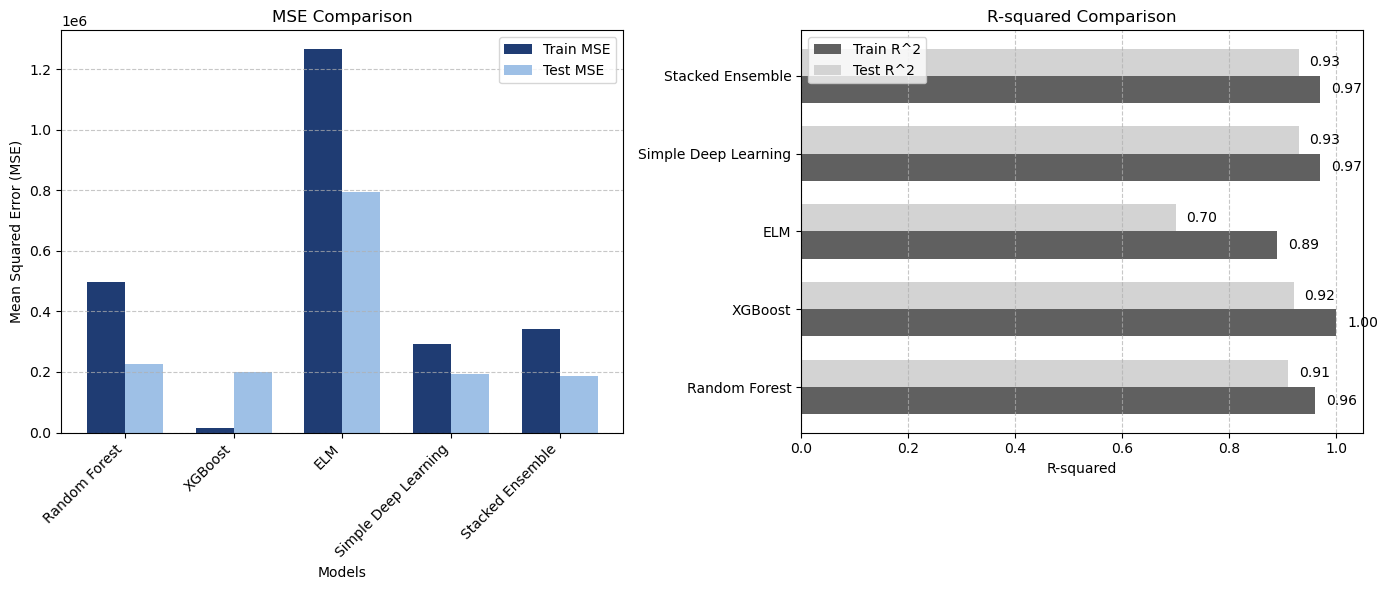

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'XGBoost', 'ELM', 'Simple Deep Learning', 'Stacked Ensemble']

# Performance data: MSE and R^2 values for training and testing sets
train_mse = [497077.62, 16574.74, 1264430.73, 291203.40, 342782.71]
train_r2 = [0.96, 1.00, 0.89, 0.97, 0.97]
test_mse = [226357.28, 201333.03, 795244.40, 194467.46, 187317.39]
test_r2 = [0.91, 0.92, 0.70, 0.93, 0.93]

# Set a professional conference color palette
train_mse_color = '#1f3c73'  # Dark Blue (Training MSE)
test_mse_color = '#9ec0e6'   # Light Blue (Test MSE)
train_r2_color = '#606060'   # Dark Gray (Training R^2)
test_r2_color = '#d3d3d3'    # Light Gray (Test R^2)

# Create figure and axis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for MSE (Training and Testing)
width = 0.35  # Bar width
x = np.arange(len(models))  # Model positions

ax[0].bar(x - width/2, train_mse, width, label='Train MSE', color=train_mse_color)
ax[0].bar(x + width/2, test_mse, width, label='Test MSE', color=test_mse_color)

ax[0].set_xlabel('Models')
ax[0].set_ylabel('Mean Squared Error (MSE)')
ax[0].set_title('MSE Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models, rotation=45, ha='right')
ax[0].legend()

# Bar plot for R^2 (Training and Testing)
ax[1].barh(x - width/2, train_r2, width, label='Train R^2', color=train_r2_color)
ax[1].barh(x + width/2, test_r2, width, label='Test R^2', color=test_r2_color)

# Add text labels for R^2
for i, (train, test) in enumerate(zip(train_r2, test_r2)):
    ax[1].text(train + 0.02, i - width/2, f'{train:.2f}', va='center', color='black', fontsize=10)
    ax[1].text(test + 0.02, i + width/2, f'{test:.2f}', va='center', color='black', fontsize=10)

ax[1].set_xlabel('R-squared')
ax[1].set_title('R-squared Comparison')
ax[1].set_yticks(x)
ax[1].set_yticklabels(models)
ax[1].legend()

# Enable grid for better readability and finer lines
ax[0].grid(True, axis='y', linestyle='--', alpha=0.7)
ax[1].grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better readability
fig.tight_layout()

# Save the figure as a PNG file
plt.savefig('model_comparison_performance.png', dpi=300)

# Optionally, display the plot
plt.show()
